In [182]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#CARGAR LAS BASES DE DATOS
#os.chdir('/Users/trinimoran/Documents/Ciencia de Datos/CC408-T13/TP3/data')
os.chdir('C:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP3')

#CAMBIEN ACA SUS CAMINOS
#os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda')

# PARTE 1 

In [183]:
#Primero cargamos las bases de datos
eph_04 = pd.read_excel('usu_individual_T124.xlsx')
eph_24 = pd.read_stata('Individual_t104.dta')
eph_04
eph_24



,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [184]:
# Para poder unificar las bases, cambiamos los nombres de las columnas a mayúsculas para que queden iguales
eph_04.columns = eph_04.columns.str.upper()
eph_24.columns = eph_24.columns.str.upper()



EJERCICIO 2 
A) Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base

In [185]:
#Como ambos DataFrame tiene diferente codificación, los limpiamos por separado según las categorías correspondientes
# Filtrar para CABA (32) y GBA (33) en 2004
eph_04_cleaned = eph_04.drop(eph_04[~eph_04['AGLOMERADO'].isin([32, 33])].index)

# Filtrar para CABA y GBA en 2024 utilizando nombres de aglomerados
eph_24_cleaned = eph_24.drop(eph_24[~eph_24['AGLOMERADO'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].index)

#Esto es para comprobar que quedan datos de ambos años en el nuevo DataFrame
print("Datos 2004 después de filtrar:", eph_04_cleaned.shape[0])
print("Datos 2024 después de filtrar:", eph_24_cleaned.shape[0])

# Concatenar los DataFrames limpios
eph_combined = pd.concat([eph_04_cleaned, eph_24_cleaned], ignore_index=True)

# Verificar la forma del nuevo DataFrame
print("Cantidad de filas en eph_combined después de concatenar:", eph_combined.shape[0])
print("Primeras filas de eph_combined:\n", eph_combined.head())


# Vemos la nueva base 
#print(eph_combined.head())
eph_combined

Datos 2004 después de filtrar: 7051
Datos 2024 después de filtrar: 7647
Cantidad de filas en eph_combined después de concatenar: 14698
Primeras filas de eph_combined:
                           CODUSU    ANO4 TRIMESTRE  NRO_HOGAR COMPONENTE H15  \
0  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          1   1   
1  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          2   1   
2  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          3   1   
3  TQSMNORWVHLLKQCDEIJAH00856914  2024.0         1        1.0          1   1   
4  TQRMNOPQQHLOLRCDEIJAH00855133  2024.0         1        1.0          1   1   

  REGION MAS_500 AGLOMERADO  PONDERA  ... IDECCFR RDECCFR GDECCFR PDECCFR  \
0      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
1      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
2      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
3      1       S         33   2368.0  ...  

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
1,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,2,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,3,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024.0,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024.0,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004.0,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004.0,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004.0,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004.0,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [186]:
eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
eph_combined['CH08'] = eph_combined['CH08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y Planes y Seguros Públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123}) 
eph_combined['NIVEL_ED'] = eph_combined['NIVEL_ED'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})
eph_combined['ESTADO'] = eph_combined['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 
eph_combined['CAT_INAC'] = eph_combined['CAT_INAC'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})


C:\Users\flori\AppData\Local\Temp\ipykernel_3844\2395081797.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\flori\AppData\Local\Temp\ipykernel_3844\2395081797.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
C:\Users\flori\AppData\Local\Temp\ipykernel_3844\2395081797.py:3: FutureWarning: Downcasting behavior

In [187]:
estado_counts_2024 = eph_combined[eph_combined['ANO4'] == 2024]['ESTADO'].value_counts()

print("\nConteo de ESTADO para 2024:")
print(estado_counts_2024)


Conteo de ESTADO para 2024:
ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64


In [188]:
# Imprimir las columnas como una lista para poder ver los nombres de todas
print(list(eph_combined.columns))


['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

B. Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.

In [190]:
# Eliminamos las observaciones con datos que no tienen sentido 
# CH06: edad
# PP03D: cantidad de ocupaciones 
# PP08D1: Monto por sueldos / jornales, salario familiar, horas extras, otras bonificaciones habituales y tickets, vales o similares percibidos en el mes de referencia 
# P21: MONTO DE INGRESO DE LA OCUPACIÓN PRINCIPAL 
# Convertir las columnas relevantes a tipo numérico
cols_to_convert = ['CH06', 'PP03D', 'PP08D1', 'P21']
eph_combined[cols_to_convert] = eph_combined[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con NaN en las columnas relevantes
#eph_combined.dropna(subset=cols_to_convert, inplace=True)

# Eliminamos las observaciones con datos que no tienen sentido 
eph_combined.drop(
    eph_combined[
        (eph_combined['CH06'] < 0) | 
        (eph_combined['PP03D'] < 0) |  
        (eph_combined['PP08D1'] < 0) | 
        (eph_combined['P21'] < 0)
    ].index, 
    inplace=True)

# Imprimir la cantidad de datos restantes después de la limpieza
print("Cantidad de datos después de la limpieza:", len(eph_combined))

#acá tenemos que redactar la justificación, no puse más porque no terminamos más si controlamos todo todo, si ven otra relevante o quieren sacar alguna háganlo

Cantidad de datos después de la limpieza: 13701


C. Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados.

In [191]:
# Convertimos 'ano4' a tipo entero para eliminar los decimales y asegurar que todos los valores sean consistentes
eph_combined['ANO4'] = eph_combined['ANO4'].astype(float).astype(int)
eph_combined

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,10.0,NaN,10,2575.0,NaN,NaN,NaN,NaN
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


Registros 2004: 7647
Registros 2024: 6054
Composición 2004:
 CH04
2    4045
1    3602
Name: count, dtype: int64
Composición 2024:
 CH04
2    3271
1    2783
Name: count, dtype: int64
DataFrame de composición:
       2004  2024
CH04            
1     3602  2783
2     4045  3271


C:\Users\flori\AppData\Local\Temp\ipykernel_3844\2125613135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_2004['CH04'] = datos_2004['CH04'].replace({'Varón': 1, 'Mujer': 2})


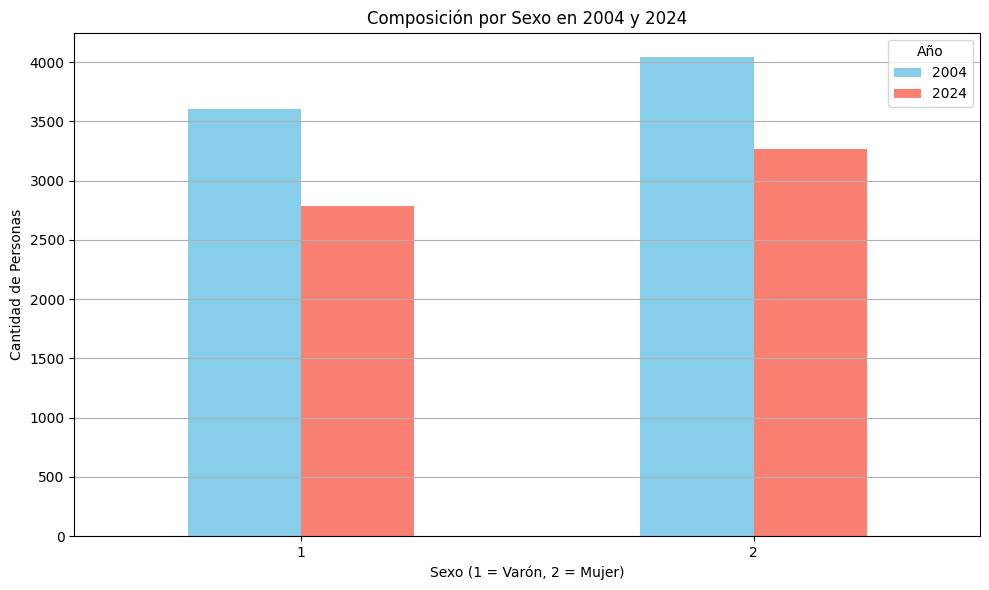

In [192]:
# Filtramos los datos
datos_2004 = eph_combined[eph_combined['ANO4'] == 2004]
datos_2024 = eph_combined[eph_combined['ANO4'] == 2024]

# Verificamos cuántos registros hay después del filtrado
print(f"Registros 2004: {len(datos_2004)}")
print(f"Registros 2024: {len(datos_2024)}")

# Convertir valores de CH04 en eph_04_cleaned
datos_2004['CH04'] = datos_2004['CH04'].replace({'Varón': 1, 'Mujer': 2})

# Contamos la cantidad de personas por sexo en cada año
composicion_2004 = datos_2004['CH04'].value_counts()
composicion_2024 = datos_2024['CH04'].value_counts()

# Imprimir los conteos para verificar si hay datos
print("Composición 2004:\n", composicion_2004)
print("Composición 2024:\n", composicion_2024)

# Reindexar ambos conteos con los valores 1 y 2
composicion_2004 = composicion_2004.reindex([1, 2], fill_value=0)
composicion_2024 = composicion_2024.reindex([1, 2], fill_value=0)


# Ahora creamos el DataFrame para graficar
df_composicion = pd.DataFrame({
    '2004': composicion_2004,
    '2024': composicion_2024
})

# Verificamos el DataFrame
print("DataFrame de composición:\n", df_composicion)


# Verificamos que hay datos antes de graficar
if not df_composicion.empty and df_composicion.sum().sum() > 0:
    # Crear gráfico de barras
    df_composicion.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
    plt.title('Composición por Sexo en 2004 y 2024')
    plt.xlabel('Sexo (1 = Varón, 2 = Mujer)')
    plt.ylabel('Cantidad de Personas')
    plt.xticks(ticks=[0, 1], labels=['1', '2'], rotation=0)  # Mostrar los códigos en el eje X
    plt.legend(title='Año')
    plt.grid(axis='y')
    plt.tight_layout()  # Ajustar el gráfico
    plt.show()
else:
    print("No hay datos para graficar.")

D. Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para

In [193]:
# Imprimir las columnas como una lista para poder ver los nombres de todas
print(list(eph_combined.columns))

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

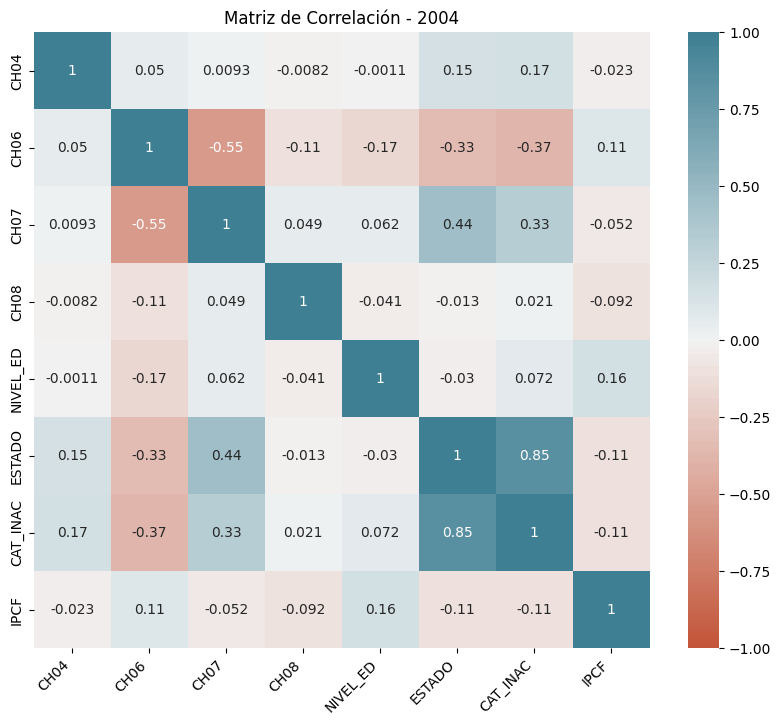

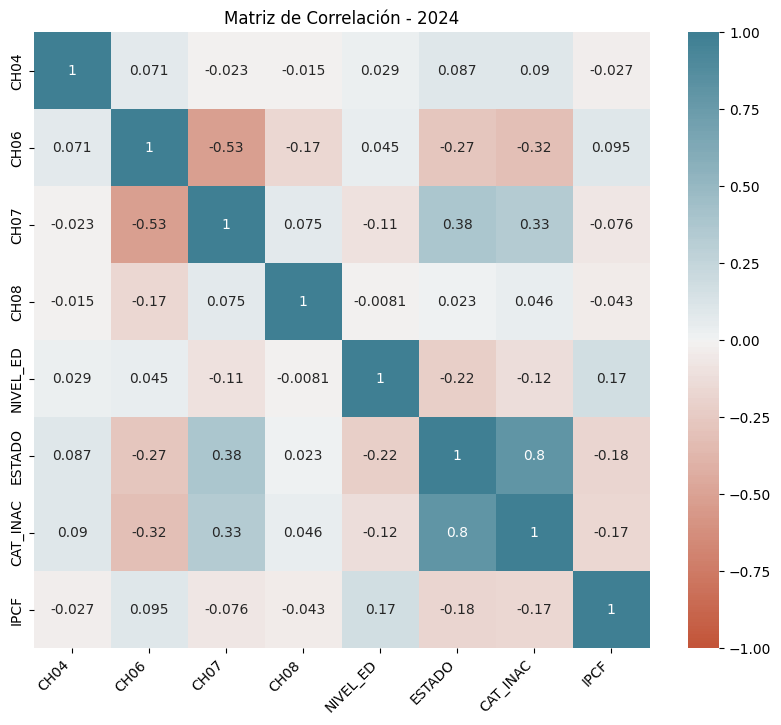

In [194]:
# Filtrar los datos para 2004 y 2024
datos_2004 = eph_combined[eph_combined['ANO4'] == 2004][['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
datos_2024 = eph_combined[eph_combined['ANO4'] == 2024][['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Eliminar filas con NaN
datos_2004.dropna(inplace=True)
datos_2024.dropna(inplace=True)

# Convertimos los valores str de la base de 2004 en int.  ME PARECE QUE PODEMOS SACAR ESTO PORQUE LO HICE PARA LA BASE ENTERA ARRIBA
#datos_2004['CH04'] = datos_2004['CH04'].replace({'Varón': 1, 'Mujer': 2})
#datos_2004['CH07'] = datos_2004['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
#datos_2004['CH08'] = datos_2004['CH08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y Planes y Seguros Públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123}) 
#datos_2004['NIVEL_ED'] = datos_2004['NIVEL_ED'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})
#datos_2004['ESTADO'] = datos_2004['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 
#datos_2004['CAT_INAC'] = datos_2004['CAT_INAC'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})


import seaborn as sns

# Crear matrices de correlación para los años 2004 y 2024
corr_2004 = datos_2004.corr()
corr_2024 = datos_2024.corr()

# Configuración del gráfico de calor para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_2004, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True  # Mostrar valores de correlación en la matriz
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de Correlación - 2004')
plt.show()

# Configuración del gráfico de calor para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_2024, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True  # Mostrar valores de correlación en la matriz
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de Correlación - 2024')
plt.show()



Paso a modo de limpieza de la base para los ejercicios siguientes

In [195]:
eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
eph_combined['CH08'] = eph_combined['CH08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y Planes y Seguros Públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123}) 
eph_combined['NIVEL_ED'] = eph_combined['NIVEL_ED'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})
eph_combined['ESTADO'] = eph_combined['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 
eph_combined['CAT_INAC'] = eph_combined['CAT_INAC'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})


E. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [196]:
# Contar desocupados
desocupados = eph_combined[(eph_combined['ESTADO'] == 2)]
cantidad_desocupados = desocupados.shape[0]

# Contar inactivos
inactivos = eph_combined[(eph_combined['ESTADO'] == 3)]
cantidad_inactivos = inactivos.shape[0]

print(f"Cantidad de desocupados: {cantidad_desocupados}")
print(f"Cantidad de inactivos: {cantidad_inactivos}")

# Calcular la media de IPCF según estado
media_ipcf_por_estado = eph_combined.groupby('ESTADO')['IPCF'].mean()

print("Media de IPCF según estado:")
print(media_ipcf_por_estado)



Cantidad de desocupados: 839
Cantidad de inactivos: 5462
Media de IPCF según estado:
ESTADO
0        10.300654
1    125240.392119
2     31655.957950
3     63863.080627
4     40220.538438
Name: IPCF, dtype: float64


3. ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [197]:
# Contar la cantidad de personas que no respondieron la condición de actividad (ESTADO=0)
no_respondieron = eph_combined[(eph_combined['ESTADO'] == 0)]
cantidad_no_respondieron = no_respondieron.shape[0]
print(f"Cantidad de personas que no respondieron su condición de actividad: {cantidad_no_respondieron}")

# Crear una base con las observaciones que respondieron la condición de actividad (ESTADO distinto de 0)
respondieron = eph_combined[eph_combined['ESTADO'].isin([1, 2, 3, 4])]

# Crear una base con las observaciones que no respondieron la condición de actividad (ESTADO=0)
norespondieron = eph_combined[eph_combined['ESTADO'] == 0]


Cantidad de personas que no respondieron su condición de actividad: 51


In [198]:
# Opcional: mostrar los primeros registros de cada DataFrame para verificación
print("Observaciones en la base 'respondieron':")
respondieron

Observaciones en la base 'respondieron':


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,10.0,NaN,10,2575.0,NaN,NaN,NaN,NaN
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [199]:
print("\nObservaciones en la base 'norespondieron':")
norespondieron


Observaciones en la base 'norespondieron':


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
14,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,2,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
15,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,3,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
16,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,4,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
24,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,1,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
25,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,2,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
26,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,3,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
975,TQRMNOQYQHMMRNCDEIJAH00802156,2024,1,1.0,1,2,1,S,33,1794.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2014,TQRMNOSPUHMMOQCDEIJAH00802618,2024,1,1.0,3,2,1,S,33,2159.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2119,TQRMNOPWSHMKTUCDEIJAH00802498,2024,1,1.0,1,2,1,S,33,3707.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2486,TQRMNOPWUHKMKPCDEIJAH00858487,2024,1,1.0,2,2,1,S,33,3046.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN


4. Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

In [200]:
# Contar la cantidad de cada estado para 2004 y 2024
estado_counts_2004 = eph_combined[eph_combined['ANO4'] == 2004]['ESTADO'].value_counts()
estado_counts_2024 = eph_combined[eph_combined['ANO4'] == 2024]['ESTADO'].value_counts()

print("Conteo de ESTADO para 2004:")
print(estado_counts_2004)
print("\nConteo de ESTADO para 2024:")
print(estado_counts_2024)


Conteo de ESTADO para 2004:
ESTADO
1    3079
3    2800
4    1230
2     528
0      10
Name: count, dtype: int64

Conteo de ESTADO para 2024:
ESTADO
3    2662
1    2278
4     762
2     311
0      41
Name: count, dtype: int64


C:\Users\flori\AppData\Local\Temp\ipykernel_3844\3638664548.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros
C:\Users\flori\AppData\Local\Temp\ipykernel_3844\3638664548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros


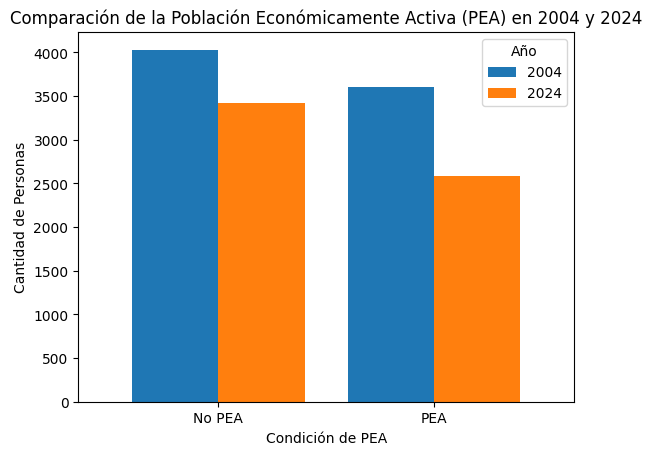

In [201]:
import numpy as np

# Agregar la columna PEA
respondieron['PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros

# Filtrar los datos para los años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Contar la cantidad de PEA (Población Económicamente Activa) y no PEA para ambos años
composicion_2004 = respondieron_2004['PEA'].value_counts()
composicion_2024 = respondieron_2024['PEA'].value_counts()

# Crear un DataFrame para la composición
composicion_df = pd.DataFrame({
    '2004': composicion_2004,
    '2024': composicion_2024
}).fillna(0)

# Graficar la composición por PEA para 2004 y 2024
composicion_df.plot(kind='bar', width=0.8)
plt.title('Comparación de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('Condición de PEA')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['No PEA', 'PEA'], rotation=0)
plt.legend(title='Año', loc='upper right')
plt.show()


